<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone: Shopee Sales Analysis

## Executive Summary
[*Jump to table of contents*](#Table-of-Contents)

In this analysis, we will be using the pycaret library to get the best models to predict sales performance in terms of quantity on Shopee. This project be focused on the Beauty and Personal Care category. This will not only allow us to forecast future sales performances in terms of categories, and will help sellers remain competitive on the platform. This in turn, increases sellers' efficiency on the platform.

We will be scraping data using Selenium from shops mainly on Shopee Mall, as it is an area on Shopee that lists verified sellers - mainly authorised distributors, retailers and flagship stores. These sellers are all regulated and are required to sell authentic products, following the guidelines of the brands they are selling. We will focus mainly on Watsons Official Store as it has a huge variety of 3000 product listings from different brands and categories within the health and beauty category, which provides us with a substantial sample size. 

The provided data dictionary is reflected below, along with an additional column describing the corresponding data type.

**The main metric we will be using to assess the models is RMSE (root mean squared error) as it allows us to accurately assess how a model performs both on train and test data. Although we are optimizing for RMSE, we will also be looking at R2 to compare between models. 

This analysis will benefit retailers in the Health and Beauty industry to make better business decisions and pick more popular products to increase sales. On Shopee, we can see that there is a limit of 3000 product listings, and larger distributors and retailers will have more than 3000 products. Listing products online, apart from their brick and mortar stores requires additional costs (creation of listings, allocating stocks to e-commerce, online stock inventory system etc.). Hence this will help Health and Beauty retailers have a better selection of products from popular categories, meeting the needs of shoppers.

In this analysis, we will be looking to answer the following questions:
* What features are most relevant for sellers to increase sale quantity?
* In what ways do categories or sub categories impact sales quantity?
* What mechanics are ideal for their range of products? 
* What other insights can we get from the analysis? 


## Problem Statement
This project aims to help retailers in the Health and Beauty industry by finding out key features or criterias that affect sale quantity on e-commerce platform. This allows sellers to have better selections of products that better suit the needs of shoppers on Shopee. 

The model can also be used to forecast future sales, and hence allow brands to restock sufficient quantities to meet the volume on the platform. This prevents sellers and brands from missing out on sales.

The model will be trained using products from Watsons' official store on Shopee Mall, using the PyCaret which will determine the suitable models. 

## Table of Contents

* [i. Data Dictionary](#i.-Data-Dictionary)
    * [1. Data Cleaning](#1.-Data-Cleaning)
        * [1.1 Installing PyCaret](#1.1-Installing-PyCaret)
        * [1.2 Import Libraries](#1.2-Import-Libraries)
        * [1.3 Preparing Dataset for Modelling](#1.3-Preparing-Dataset-for-Modelling)
    * [2. Modelling](#2.-Modelling)
        * [2.1 PyCaret for Baseline Model](#2.1-PyCaret-for-Baseline-Model)
            * [1.1.5 Scraping earliest review dates from each product link](#1.1.5-Scraping-earliest-review-dates-from-each-product-link)

## 1. Data Cleaning
[*Jump to table of contents*](#Table-of-Contents)
### 1.1 Installing PyCaret
[*Jump to table of contents*](#Table-of-Contents)

In [1]:
# !pip install pycaret shap # Only run once

In [2]:
# !pip uninstall -y scikit-learn 
# !pip install scikit-learn==0.23.2 # Only run once

In [3]:
# check version
from pycaret.utils import version
version()

'2.3.5'

### 1.2 Import Libraries
[*Jump to table of contents*](#Table-of-Contents)

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

plt.rcParams['font.size'] = 14

sns.set_style(style='white')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
# load CSV file as df
df = pd.read_csv('watsons_dclean.csv')

### 1.3 Preparing Dataset for Modelling
[*Jump to table of contents*](#Table-of-Contents)

In [7]:
df

,Unnamed: 0,ProductName,OriginalPrice,SalePrice,Discount,Vouchers,Ratings,NoOfRatings,Comments,Media,Brand,QtySold,Favourites,ProductDescription,link,SubCat1,SubCat2,SubCat3,Content
0,0,SD BIOSENSOR Standard Q Covid-19 AG Home Test ...,13.00,7.30,44,None,4.9,830,424,312,SD BIOSENSOR,16500,1700,SD BIOSENSOR Standard Q Covid-19 AG Home Test ...,https://shopee.sg/SD-BIOSENSOR-Standard-Q-Covi...,Health & Wellness,Medical Supplies,Health Monitors,276.0
1,1,Kodomo Baby Wipes 70'S,2.00,2.00,0,None,5.0,251,96,61,KODOMO,4200,222,Watsons is Singapore's leading beauty and heal...,https://shopee.sg/Kodomo-Baby-Wipes-70'S-i.195...,"Toys, Kids & Babies",Bath & Baby Care,Baby Wipes,296.0
2,2,Dr Tung's Smart Dental Floss 27M,5.10,4.80,6,"$6 OFF, $12 OFF, $25 OFF",5.0,70,32,19,Dr.Tung's,648,68,Watsons is Singapore's leading beauty and heal...,https://shopee.sg/Dr-Tung's-Smart-Dental-Floss...,Beauty & Personal Care,Oral Care,Oral Accessories,296.0
3,3,Watsons Goat Milk Cream Bath 1L,6.90,2.45,64,"$6 OFF, $12 OFF, $25 OFF",5.0,154,59,53,Watsons,606,76,Watsons is Singapore's leading beauty and heal...,https://shopee.sg/Watsons-Goat-Milk-Cream-Bath...,Beauty & Personal Care,Skincare,Moisturizer,296.0
4,4,WATSONS Square Puffs Facial Cotton - 3x160s (E...,4.90,4.90,0,"$6 OFF, $12 OFF, $25 OFF",5.0,143,51,44,Watsons,439,96,"Watsons Square Puffs are made from lint free, ...",https://shopee.sg/WATSONS-Square-Puffs-Facial-...,Beauty & Personal Care,Beauty Devices & Tools,Makeup Accessories,519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2921,Durex Extra Safe 3s,6.25,6.25,0,"$6 OFF, $12 OFF, $25 OFF",5.0,1,0,0,durex,3,0,Slightly thicker than our standard condoms for...,https://shopee.sg/Durex-Extra-Safe-3s-i.195238...,Health & Wellness,Sexual Wellness,Condoms,1098.0
2922,2922,NATURE'S ESSENCE Brite Eyes Vegetarian Caplets...,36.45,36.45,0,"$6 OFF, $12 OFF, $25 OFF",5.0,1,1,1,NATURE'S ESSENCE,1,0,Brite Eyes contains a comphrensive formula tha...,https://shopee.sg/NATURE'S-ESSENCE-Brite-Eyes-...,Health & Wellness,Food Nutrition,Others,992.0
2923,2923,Kinohimitsu D'Tox Plum Juice (Flush Out Toxins...,39.90,33.85,15,"$6 OFF, $12 OFF, $25 OFF",5.0,1,1,1,KINOHIMITSU,1,0,"""KINOHIMITSU D’tox Juice 6-Day Program is a sm...",https://shopee.sg/Kinohimitsu-D'Tox-Plum-Juice...,Health & Wellness,Weight Management,Others,793.0
2924,2924,Leaders Insolution Mediu Amino Lifting Mask 5S,12.00,10.20,15,"$6 OFF, $12 OFF, $25 OFF",5.0,1,0,0,LEADERS,1,1,Mediu Amino Lifting Mask firms up your skin by...,https://shopee.sg/Leaders-Insolution-Mediu-Ami...,Beauty & Personal Care,Skincare,Mask,1687.0


In [8]:
#Remove Unnamed: 0 - it is a index column
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.shape # Check if the column is dropped

(2926, 18)

In [9]:
#Remove ProductDescription as we will not be analysing long texts
df.drop(columns=['ProductDescription'], axis=1, inplace=True)
df.shape # Check if the column is dropped

(2926, 17)

In [10]:
#Remove ProductName and link as we will not be analysing long texts
df.drop(columns=['ProductName','link'], axis=1, inplace=True)
df # Check if the column is dropped

,OriginalPrice,SalePrice,Discount,Vouchers,Ratings,NoOfRatings,Comments,Media,Brand,QtySold,Favourites,SubCat1,SubCat2,SubCat3,Content
0,13.00,7.30,44,None,4.9,830,424,312,SD BIOSENSOR,16500,1700,Health & Wellness,Medical Supplies,Health Monitors,276.0
1,2.00,2.00,0,None,5.0,251,96,61,KODOMO,4200,222,"Toys, Kids & Babies",Bath & Baby Care,Baby Wipes,296.0
2,5.10,4.80,6,"$6 OFF, $12 OFF, $25 OFF",5.0,70,32,19,Dr.Tung's,648,68,Beauty & Personal Care,Oral Care,Oral Accessories,296.0
3,6.90,2.45,64,"$6 OFF, $12 OFF, $25 OFF",5.0,154,59,53,Watsons,606,76,Beauty & Personal Care,Skincare,Moisturizer,296.0
4,4.90,4.90,0,"$6 OFF, $12 OFF, $25 OFF",5.0,143,51,44,Watsons,439,96,Beauty & Personal Care,Beauty Devices & Tools,Makeup Accessories,519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,6.25,6.25,0,"$6 OFF, $12 OFF, $25 OFF",5.0,1,0,0,durex,3,0,Health & Wellness,Sexual Wellness,Condoms,1098.0
2922,36.45,36.45,0,"$6 OFF, $12 OFF, $25 OFF",5.0,1,1,1,NATURE'S ESSENCE,1,0,Health & Wellness,Food Nutrition,Others,992.0
2923,39.90,33.85,15,"$6 OFF, $12 OFF, $25 OFF",5.0,1,1,1,KINOHIMITSU,1,0,Health & Wellness,Weight Management,Others,793.0
2924,12.00,10.20,15,"$6 OFF, $12 OFF, $25 OFF",5.0,1,0,0,LEADERS,1,1,Beauty & Personal Care,Skincare,Mask,1687.0


#### 1.3.1 Get Dummies for string columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OriginalPrice  2926 non-null   float64
 1   SalePrice      2926 non-null   float64
 2   Discount       2926 non-null   int64  
 3   Vouchers       2926 non-null   object 
 4   Ratings        2468 non-null   float64
 5   NoOfRatings    2926 non-null   int64  
 6   Comments       2926 non-null   int64  
 7   Media          2926 non-null   int64  
 8   Brand          2926 non-null   object 
 9   QtySold        2926 non-null   int64  
 10  Favourites     2926 non-null   int64  
 11  SubCat1        2926 non-null   object 
 12  SubCat2        2926 non-null   object 
 13  SubCat3        2926 non-null   object 
 14  Content        2926 non-null   float64
dtypes: float64(4), int64(6), object(5)
memory usage: 343.0+ KB


In [12]:
nominal = ['Vouchers', 'Brand', 'SubCat1', 'SubCat2', 'SubCat3']

In [13]:
df[df['Brand']=="None"]

,OriginalPrice,SalePrice,Discount,Vouchers,Ratings,NoOfRatings,Comments,Media,Brand,QtySold,Favourites,SubCat1,SubCat2,SubCat3,Content


In [14]:
# Apply one hot encoding to two datasets.
df1 = pd.get_dummies(df, columns=nominal, drop_first=True)

In [15]:
df1

,OriginalPrice,SalePrice,Discount,Ratings,NoOfRatings,Comments,Media,QtySold,Favourites,Content,Vouchers_None,Brand_- None -,Brand_21ST CENTURY,Brand_3M,Brand_A-DERMA,Brand_AFC,Brand_AHC,Brand_AMMELTZ,Brand_ANESSA,Brand_ASTALIFT,Brand_ATORREGE AD+,Brand_AVALON,Brand_AVEDA,Brand_Abbott,Brand_Accu-Chek,Brand_Acti-Tape,Brand_Against24,Brand_Alcon,Brand_Aleve,Brand_Alka-Seltzer,Brand_Alo Natura,Brand_Appeton,Brand_Ascensia,Brand_Audace,Brand_Audisol,Brand_Avalon Organics,Brand_Aveeno,Brand_Axe Brand,Brand_BACTISHIELD,Brand_BANANA BOAT,Brand_BANILA CO,Brand_BAUSCH + LOMB,Brand_BAUSCH AND LOMB,Brand_BIOGLAN,Brand_BLACKMORES,Brand_BONOTOX,Brand_BRAND'S,Brand_Baby Carrie,Brand_Baby Sebamed,Brand_Bactidol,Brand_Batiste,Brand_Bausch & Lomb,Brand_Beautylabo,Brand_Bekunis,Brand_Beneprotein,Brand_Berocca,Brand_Betadine,Brand_Bifesta,Brand_Bigen,Brand_Bio-Oil,Brand_Bio-essence,Brand_Biocalth,Brand_Bioderma,Brand_Biolane,Brand_Biore,Brand_Biostime,Brand_Black Gold,Brand_Bonjela,Brand_Borsch Med,Brand_Browlash,Brand_CALTRATE,Brand_CANMAKE,Brand_CEZANNE,Brand_CLEAR,Brand_CLINIQUE,Brand_CLIO,Brand_COSRX,Brand_Calcit Ultra,Brand_Candazole,Brand_Canesten,Brand_Cardiprin,Brand_Carefree,Brand_Carnation Footcare,Brand_Cath Kidston,Brand_Cationorm,Brand_Cebion,Brand_Cellapy,Brand_Centrum,Brand_Ceradan,Brand_Cetaphil,Brand_Cielo,Brand_Clean & Clear,Brand_Cloversoft,Brand_Colgate,Brand_Collagen By Watsons,Brand_Contour,Brand_Cure,Brand_Curel,Brand_DAENG GI MEO RI,Brand_DARIYA,Brand_DHC,Brand_DR.WU,Brand_DairyCare,Brand_Darlie,Brand_Dashing Diva,Brand_Decolgen,Brand_Dentiste,Brand_Dequadin,Brand_Derma Lab,Brand_Desitin,Brand_Dettol,Brand_Diane,Brand_Diane Bonheur,Brand_Disney,Brand_Doctor's Best,Brand_Dolly Wink,Brand_Dove,Brand_Dr OatCare,Brand_Dr. Bronner's,Brand_Dr. Jart+,Brand_Dr. LeWinn's,Brand_Dr.G,Brand_Dr.Tung's,Brand_Dulcolax,Brand_Dumex,Brand_Duolac,Brand_EBENE,Brand_ELANCYL Laboratoire,Brand_ENERVON,Brand_EYE MO,Brand_Eagle Brand,Brand_Eau Thermale Avene,Brand_Efamol,Brand_Ego,Brand_Ego Pharmaceuticals,Brand_Elgydium,Brand_Ellips,Brand_Embryolisse,Brand_Enfagrow,Brand_Ensure,Brand_Enterogermina,Brand_Essano,Brand_Essentiale,Brand_Estee Lauder,Brand_Eu Yan Sang,Brand_Eucerin,Brand_Eversoft,Brand_Fastum Gel Max,Brand_Follow Me,Brand_Foot Petals,Brand_For Beloved One,Brand_Forest Beauty,Brand_Freedom Cups,Brand_Freestyle,Brand_Fybogel,Brand_GATSBY,Brand_GROW,Brand_Garnier,Brand_Gaviscon,Brand_Gerber,Brand_Gillette,Brand_Ginvera,Brand_Glucerna,Brand_GreenLife,Brand_HAIR SYSTEM WATSONS,Brand_HASK,Brand_HATOMUGI,Brand_HUGGIES,Brand_Hada Labo,Brand_Hadabisei,Brand_Hansaplast,Brand_Harpic,Brand_Head & Shoulders,Brand_Heavy Rotation,Brand_Herbal Essences,Brand_Herbion,Brand_Heritage,Brand_Heroine make,Brand_Herpatch,Brand_Himalaya,Brand_Hirudoid,Brand_Hiruscar,Brand_Hisamitsu,Brand_Holistic Way,Brand_Hyland's,Brand_HypoCol,Brand_ICM Pharma,Brand_Isomil,Brand_JOHNSON'S,Brand_Johnson & Johnson,Brand_Jorubi,Brand_Juicy Couture,Brand_K-palette,Brand_KINOHIMITSU,Brand_KLab,Brand_KOBAYASHI,Brand_KODOMO,Brand_Kao,Brand_Karihome,Brand_Kate Tokyo,Brand_KinderNurture,Brand_Kirei Kirei,Brand_Kleenex,Brand_Klorane,Brand_Koolfever,Brand_Kordel's,Brand_Kose,Brand_Kose Cosmeport,Brand_L'OREAL,Brand_L'OREAL PARIS,Brand_LAB SERIES,Brand_LEADERS,Brand_LION,Brand_LUX,Brand_La Roche-Posay,Brand_Labo Labo,Brand_Lacteol Fort,Brand_Lansinoh,Brand_Laundrin',Brand_Laurier,Brand_Leftose,Brand_Liese,Brand_Lifebuoy,Brand_Lille,Brand_Listerine,Brand_LuLuLun,Brand_Lucido-l,Brand_Lysol,Brand_MARO 17,Brand_MEDIHEAL,Brand_MELANO CC,Brand_MENTHOLATUM,Brand_MINON,Brand_MOROCCANOIL,Brand_Ma Cherie,Brand_MamyPoko,Brand_Mane 'n Tail,Brand_Marc Anthony,Brand_Maybelline New York,Brand_MegRhythm,Brand_Milani Cosmetics,Brand_Minon Amino Moist,Brand_Mise-En-Scene,Brand_Moz Away,Brand_Mucosolvan,Brand_Mundicare,Brand_My Beauty Diary,Brand_NARUKO,Brand_NATURAL BRAND,Brand_NATURE'S ESSENCE,Brand_NaturVital,Brand_Naturals by Watsons,Brand_Nature's Essentials,Brand_Nature's Green,Brand_Nature's Way

## 2. Modelling
[*Jump to table of contents*](#Table-of-Contents)
### 2.1 PyCaret for Baseline Model
[*Jump to table of contents*](#Table-of-Contents)

In [16]:
# data = get_data(df1)
reg1 = setup(data = df1, target = 'QtySold', normalize = True, remove_multicollinearity = True)

,Description,Value
0,session_id,8957
1,Target,QtySold
2,Original Data,"(2926, 611)"
3,Missing Values,True
4,Numeric Features,610
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2048, 586)"


In [17]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,20.9351,80922.3343,158.7470,0.5010,0.8845,1.7749,0.5220
par,Passive Aggressive Regressor,21.6651,79327.1768,158.4683,0.4860,0.9460,2.0924,0.1000
omp,Orthogonal Matching Pursuit,22.3329,59486.3481,143.4415,0.4704,0.9887,2.2685,0.0620
et,Extra Trees Regressor,20.3252,122026.5871,190.0181,0.3838,0.7242,0.9363,3.0840
llar,Lasso Least Angle Regression,24.1300,118357.9114,188.4366,0.3835,1.0446,2.3211,0.9900
rf,Random Forest Regressor,19.6884,122852.2039,190.7999,0.3789,0.6714,0.8982,1.9180
gbr,Gradient Boosting Regressor,20.9014,126484.3737,193.4976,0.3493,0.7775,1.2955,0.6880
dt,Decision Tree Regressor,22.5040,131092.6776,199.2875,0.2811,0.8738,1.1223,0.0860
knn,K Neighbors Regressor,24.9466,127835.1387,198.5587,0.2787,1.0319,2.0422,0.2800
ada,AdaBoost Regressor,50.9011,127962.7013,202.9492,0.0871,1.9054,11.5506,0.3380


### 2.2 Modelling using PyCaret (After further cleaning)

In [18]:
# load CSV file as df
df_clean = pd.read_csv('watsons_model.csv')

In [19]:
df_clean

,Unnamed: 0,OriginalPrice,SalePrice,Discount,Ratings,Comments,Media,Brand,QtySold,Favourites,link,SubCat1,SubCat2,SubCat3,Content,LogQtySold,NORPercent
0,0,88.00,64.70,26,5.0,70,59,ORITA,203,64,https://shopee.sg/ORITA-Dehumidifier-Charcoal-...,Home Appliances,Cooling & Heating,Air Humidifier,957.0,5.313206,0.492611
1,1,7.90,7.00,11,5.0,37,28,ROHTO,285,111,https://shopee.sg/Rohto-Cool-Eye-Drops-13Ml-i....,Health & Wellness,OTC Medications,"Eye, Nose, Throat Care",296.0,5.652489,0.231579
2,2,6.90,3.50,49,5.0,43,35,Watsons,303,92,https://shopee.sg/Watsons-Peach-Shower-Gel-1L-...,Beauty & Personal Care,Men's Grooming,Bath & Body Care,296.0,5.713733,0.346535
3,3,138.90,69.00,50,5.0,60,48,KINOHIMITSU,253,45,https://shopee.sg/Kinohimotsu-Stemcell-Drink-5...,Health & Wellness,Beauty Supplements,Collagen,1497.0,5.533389,0.328063
4,4,27.60,24.10,13,4.9,39,35,Vapex,267,58,https://shopee.sg/Zyrtec-R-2X10S-i.195238920.4...,Health & Wellness,OTC Medications,Others,336.0,5.587249,0.295880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,2897,6.25,6.25,0,5.0,0,0,durex,3,0,https://shopee.sg/Durex-Extra-Safe-3s-i.195238...,Health & Wellness,Sexual Wellness,Condoms,1098.0,1.098612,0.333333
2898,2898,36.45,36.45,0,5.0,1,1,NATURE'S ESSENCE,1,0,https://shopee.sg/NATURE'S-ESSENCE-Brite-Eyes-...,Health & Wellness,Food Nutrition,Others,992.0,0.000000,1.000000
2899,2899,39.90,33.85,15,5.0,1,1,KINOHIMITSU,1,0,https://shopee.sg/Kinohimitsu-D'Tox-Plum-Juice...,Health & Wellness,Weight Management,Others,793.0,0.000000,1.000000
2900,2900,12.00,10.20,15,5.0,0,0,LEADERS,1,1,https://shopee.sg/Leaders-Insolution-Mediu-Ami...,Beauty & Personal Care,Skincare,Mask,1687.0,0.000000,1.000000


In [20]:
#Remove Unnamed: 0 - it is a index column
df_clean.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df_clean.shape # Check if the column is dropped

(2902, 16)

In [21]:
#Remove link as we will not be analysing long texts
df_clean.drop(columns=['link'], axis=1, inplace=True)
df_clean.head() # Check if the column is dropped

,OriginalPrice,SalePrice,Discount,Ratings,Comments,Media,Brand,QtySold,Favourites,SubCat1,SubCat2,SubCat3,Content,LogQtySold,NORPercent
0,88.0,64.7,26,5.0,70,59,ORITA,203,64,Home Appliances,Cooling & Heating,Air Humidifier,957.0,5.313206,0.492611
1,7.9,7.0,11,5.0,37,28,ROHTO,285,111,Health & Wellness,OTC Medications,"Eye, Nose, Throat Care",296.0,5.652489,0.231579
2,6.9,3.5,49,5.0,43,35,Watsons,303,92,Beauty & Personal Care,Men's Grooming,Bath & Body Care,296.0,5.713733,0.346535
3,138.9,69.0,50,5.0,60,48,KINOHIMITSU,253,45,Health & Wellness,Beauty Supplements,Collagen,1497.0,5.533389,0.328063
4,27.6,24.1,13,4.9,39,35,Vapex,267,58,Health & Wellness,OTC Medications,Others,336.0,5.587249,0.295880


In [22]:
#Remove Unnamed: 0 - it is a index column
df_clean = df_clean.drop(columns=['LogQtySold'], axis=1)
df_clean.shape # Check if the column is dropped

(2902, 14)

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2902 entries, 0 to 2901
Columns: 606 entries, OriginalPrice to SubCat3_Yoga Mats
dtypes: float64(5), int64(5), uint8(596)
memory usage: 1.9 MB


In [23]:
# Apply one hot encoding to two datasets.
nominal1 = ['Brand','SubCat1','SubCat2','SubCat3']
df_clean = pd.get_dummies(df_clean, columns=nominal1, drop_first=True)

In [25]:
df.head()

,OriginalPrice,SalePrice,Discount,Vouchers,Ratings,NoOfRatings,Comments,Media,Brand,QtySold,Favourites,SubCat1,SubCat2,SubCat3,Content
0,13.0,7.30,44,None,4.9,830,424,312,SD BIOSENSOR,16500,1700,Health & Wellness,Medical Supplies,Health Monitors,276.0
1,2.0,2.00,0,None,5.0,251,96,61,KODOMO,4200,222,"Toys, Kids & Babies",Bath & Baby Care,Baby Wipes,296.0
2,5.1,4.80,6,"$6 OFF, $12 OFF, $25 OFF",5.0,70,32,19,Dr.Tung's,648,68,Beauty & Personal Care,Oral Care,Oral Accessories,296.0
3,6.9,2.45,64,"$6 OFF, $12 OFF, $25 OFF",5.0,154,59,53,Watsons,606,76,Beauty & Personal Care,Skincare,Moisturizer,296.0
4,4.9,4.90,0,"$6 OFF, $12 OFF, $25 OFF",5.0,143,51,44,Watsons,439,96,Beauty & Personal Care,Beauty Devices & Tools,Makeup Accessories,519.0


In [26]:
# data = get_data(df1)
reg2 = setup(data = df_clean, target = 'QtySold', normalize = True, 
              remove_multicollinearity = True)

,Description,Value
0,session_id,2093
1,Target,QtySold
2,Original Data,"(2902, 606)"
3,Missing Values,True
4,Numeric Features,605
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2031, 573)"


In [27]:
best_model = compare_models(fold=5, errors = "raise")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,5.7172,147.2150,12.0020,0.8883,0.4817,0.5326,0.6500
lightgbm,Light Gradient Boosting Machine,5.6043,151.0154,12.1873,0.8850,0.4506,0.4847,0.1100
et,Extra Trees Regressor,5.4799,150.7139,12.1876,0.8843,0.4088,0.3877,2.0020
rf,Random Forest Regressor,5.3982,154.1610,12.2846,0.8824,0.3939,0.3776,1.3340
dt,Decision Tree Regressor,6.9200,270.6511,16.3743,0.7918,0.5021,0.4458,0.0860
knn,K Neighbors Regressor,8.5482,308.0777,17.5318,0.7581,0.6702,0.9018,0.3080
br,Bayesian Ridge,9.2956,335.7646,18.2329,0.7437,0.7731,1.4987,0.3140
lasso,Lasso Regression,9.2304,354.7174,18.7482,0.7289,0.7478,1.3790,0.0560
huber,Huber Regressor,8.6901,355.3234,18.7505,0.7289,0.6873,1.0675,0.6080
ridge,Ridge Regression,10.0350,379.0316,19.3700,0.7094,0.8168,1.6374,0.0420


In [28]:
gbr = create_model ('gbr', fold = 5)
# tuned_huber = tune_model(et, n_iter =100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.1732,98.1264,9.9059,0.9018,0.4709,0.5112
1,6.5694,223.9722,14.9657,0.8455,0.5002,0.5799
2,5.4942,135.1447,11.6252,0.9073,0.4462,0.4950
3,5.9553,165.1428,12.8508,0.8852,0.5244,0.5741
4,5.3937,113.6888,10.6625,0.9018,0.4670,0.5026
Mean,5.7172,147.2150,12.0020,0.8883,0.4817,0.5326
SD,0.4967,44.4803,1.7795,0.0227,0.0274,0.0367


In [39]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.3909,118.4049,10.8814,0.9092,0.4116,0.4487
1,4.8091,83.0701,9.1143,0.8795,0.4584,0.5054
2,5.6627,124.3095,11.1494,0.8522,0.4704,0.5442
3,7.2655,263.7438,16.2402,0.8707,0.4436,0.5128
4,4.8433,98.2805,9.9137,0.8770,0.4081,0.4943
5,6.4201,187.3792,13.6887,0.9100,0.4335,0.4989
6,5.2650,132.0403,11.4909,0.9211,0.4264,0.4415
7,5.5358,112.4282,10.6032,0.9064,0.4987,0.4894
8,5.3690,121.0309,11.0014,0.9077,0.4691,0.4088
9,5.5145,110.4739,10.5107,0.8900,0.4434,0.5334


In [41]:
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=7,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.1, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=30,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2093, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


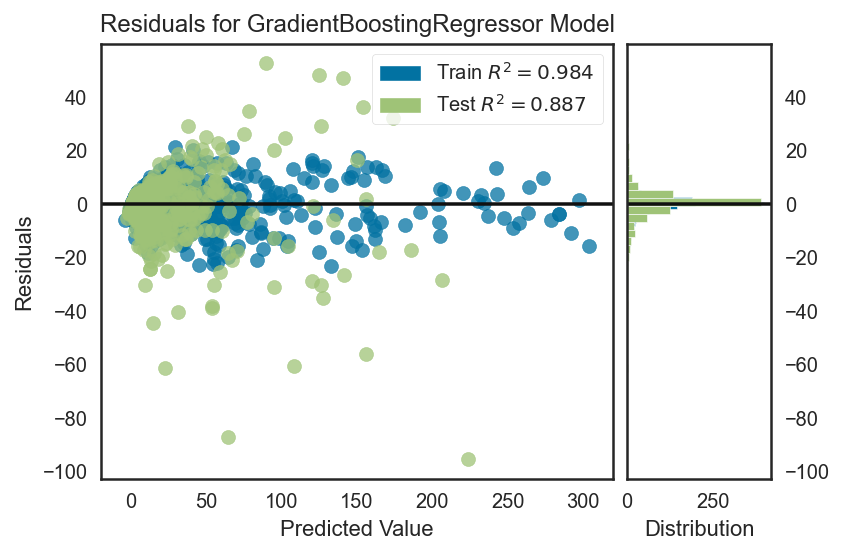

In [42]:
plot_model(tuned_gbr)

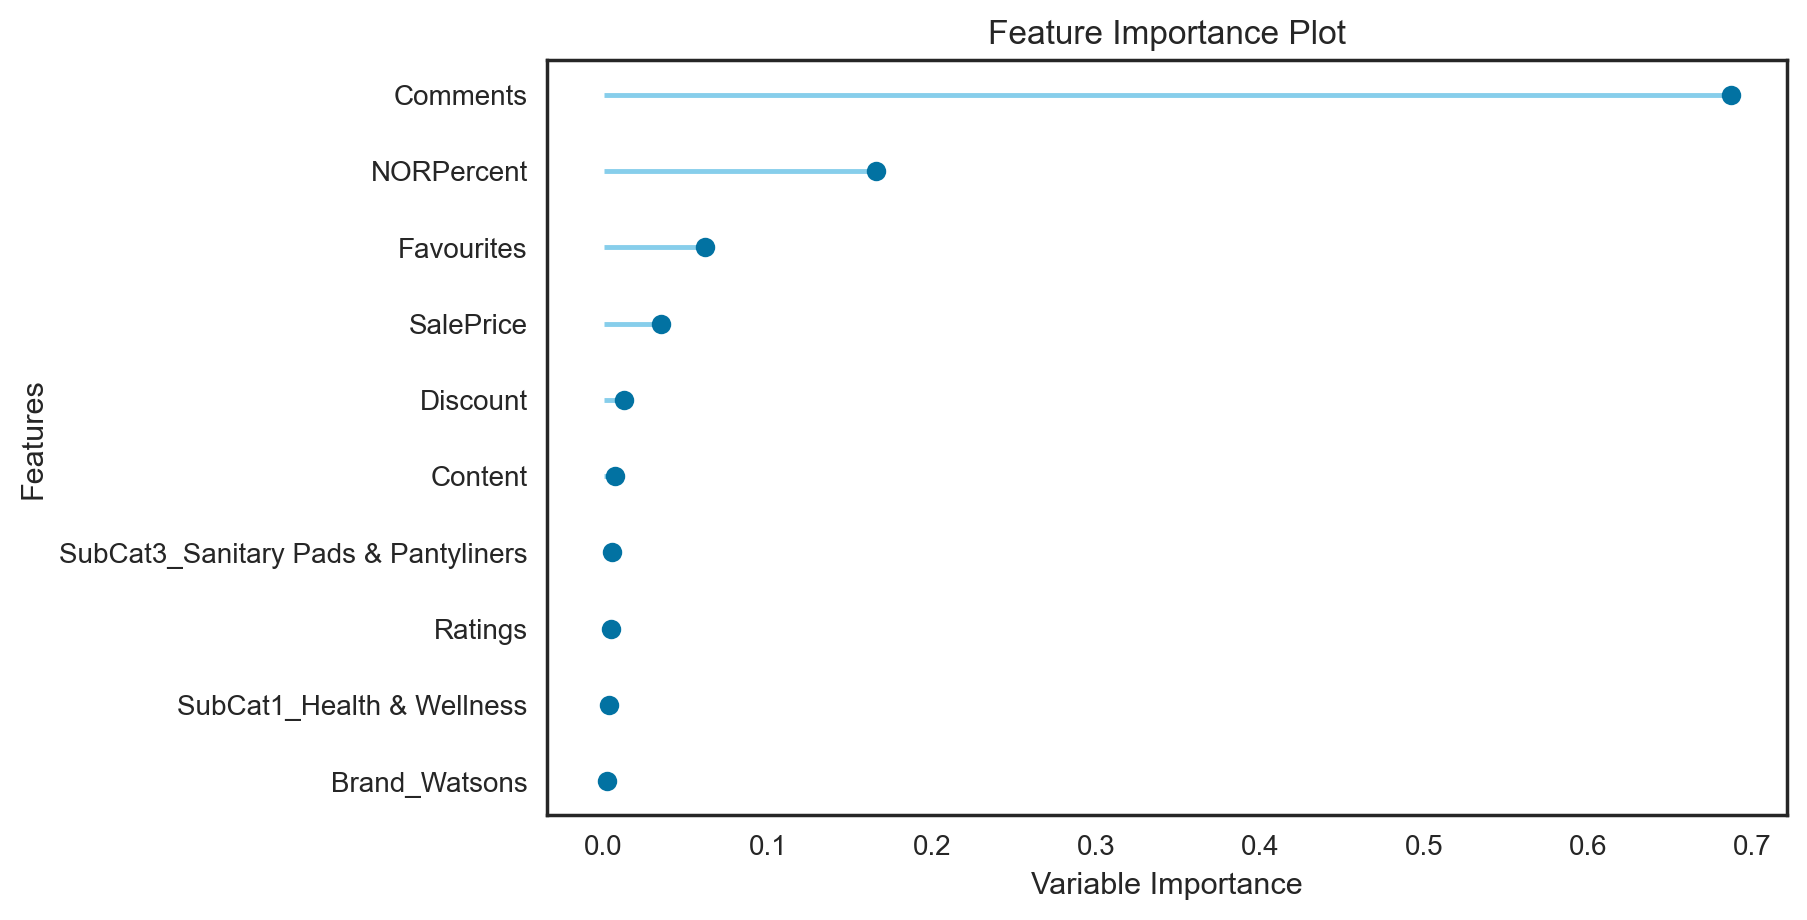

In [46]:
plot_model(tuned_gbr, plot='feature')

In [29]:
lightgbm = create_model ('lightgbm', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.8270,103.2127,10.1594,0.8967,0.4289,0.4348
1,6.3151,205.4320,14.3329,0.8583,0.4382,0.4983
2,5.5733,133.9825,11.5751,0.9081,0.4613,0.5251
3,5.9246,187.7412,13.7019,0.8695,0.4674,0.4694
4,5.3812,124.7084,11.1673,0.8923,0.4572,0.4959
Mean,5.6043,151.0154,12.1873,0.8850,0.4506,0.4847
SD,0.5025,38.9287,1.5764,0.0183,0.0146,0.0306


In [43]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.5624,134.8281,11.6115,0.8966,0.4689,0.4786
1,4.9945,95.7306,9.7842,0.8612,0.4717,0.5233
2,5.5893,116.4623,10.7918,0.8615,0.4869,0.5536
3,6.7853,251.2718,15.8516,0.8768,0.4011,0.4750
4,4.7175,86.8894,9.3214,0.8912,0.4410,0.4883
5,6.5384,191.7909,13.8489,0.9079,0.4474,0.4891
6,5.9833,218.8776,14.7945,0.8693,0.4649,0.4797
7,5.3689,116.4603,10.7917,0.9031,0.4970,0.5005
8,5.9479,170.7295,13.0664,0.8697,0.4704,0.4356
9,5.3826,93.0876,9.6482,0.9073,0.4667,0.5422


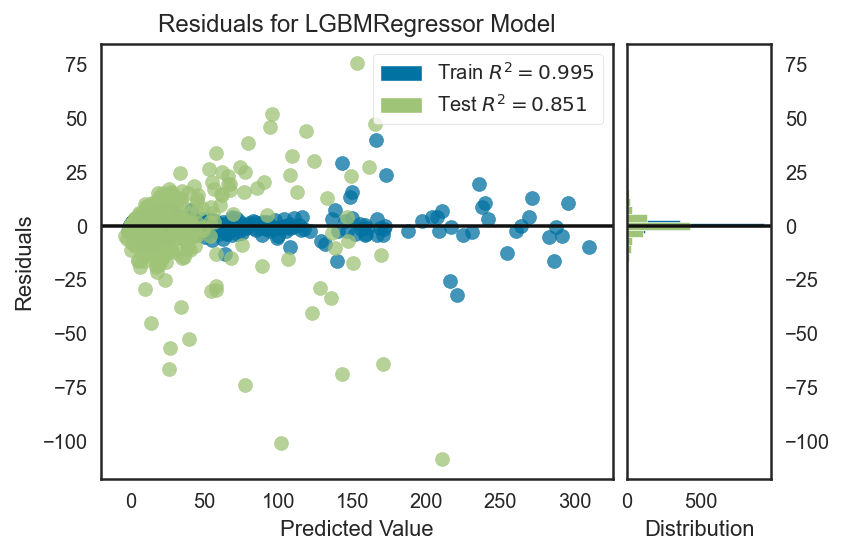

In [44]:
plot_model(tuned_lightgbm)

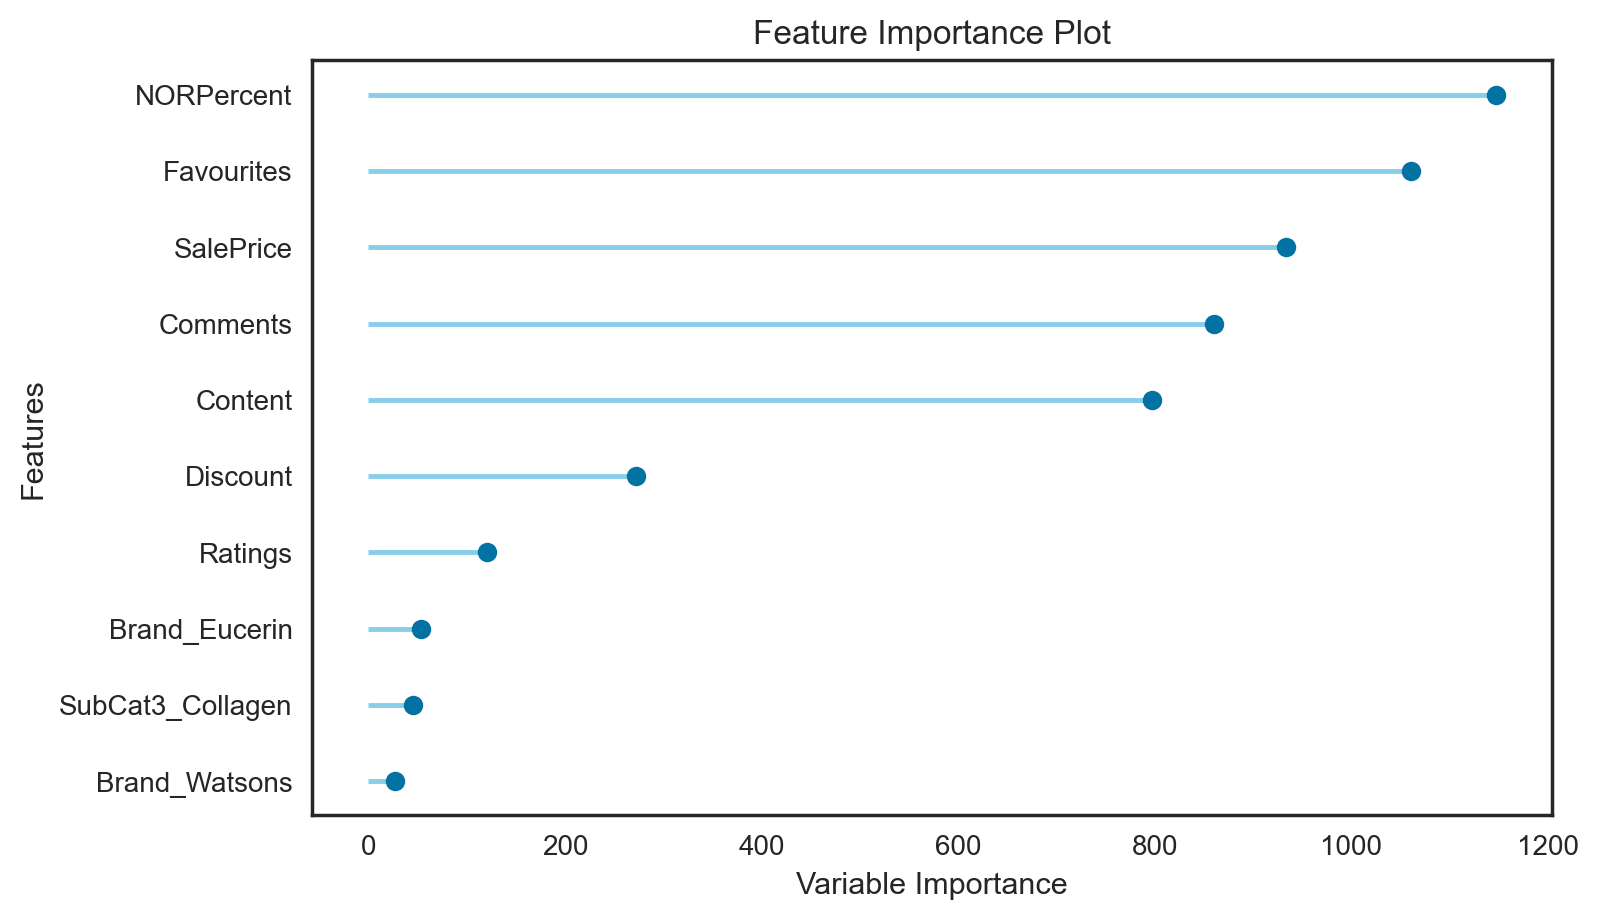

In [45]:
plot_model(tuned_lightgbm, plot='feature')

In [31]:
plot_model(gbr, plot = 'parameter')

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,ls
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


In [32]:
plot_model(lightgbm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [34]:
bagged_gbr = ensemble_model(gbr, method = 'Bagging')
print(bagged_gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.4159,129.6192,11.3850,0.9006,0.4362,0.4683
1,4.7429,78.0593,8.8351,0.8868,0.4719,0.5273
2,5.5578,119.8188,10.9462,0.8575,0.4699,0.5707
3,7.4031,296.8035,17.2280,0.8545,0.4790,0.5660
4,4.3794,72.2990,8.5029,0.9095,0.4315,0.5041
5,6.4239,181.4672,13.4710,0.9129,0.4313,0.4533
6,5.5347,167.3230,12.9353,0.9001,0.4675,0.5018
7,5.8044,131.9067,11.4851,0.8902,0.5445,0.6088
8,5.3979,140.9887,11.8739,0.8924,0.4636,0.4243
9,5.0599,90.7259,9.5250,0.9097,0.4593,0.5659


BaggingRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9,
                                                          ccp_alpha=0.0,
                                                          criterion='friedman_mse',
                                                          init=None,
                                                          learning_rate=0.1,
                                                          loss='ls',
                                                          max_depth=3,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
       

In [35]:
boosted_gbr = ensemble_model(gbr, method = 'Boosting')
print(boosted_gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.7319,118.3660,10.8796,0.9093,0.5170,0.5869
1,5.0054,78.4103,8.8550,0.8863,0.5649,0.6460
2,6.1083,125.0900,11.1844,0.8513,0.5625,0.6951
3,7.3636,263.7552,16.2405,0.8707,0.5224,0.6308
4,4.5825,74.0744,8.6066,0.9073,0.4606,0.5251
5,6.6252,175.0315,13.2299,0.9160,0.4982,0.5550
6,6.0976,183.0734,13.5305,0.8906,0.5577,0.5762
7,6.4354,132.7219,11.5205,0.8895,0.6099,0.6827
8,5.7383,125.6830,11.2108,0.9041,0.5382,0.5282
9,5.4589,78.8259,8.8784,0.9215,0.5394,0.6980


AdaBoostRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9,
                                                           ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='ls',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_spl

In [36]:
bagged_lightgbm = ensemble_model(lightgbm, method = "Bagging")
print(bagged_lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.2562,116.2298,10.7810,0.9109,0.3989,0.4263
1,4.6273,106.5332,10.3215,0.8455,0.4095,0.4308
2,5.4709,120.5958,10.9816,0.8566,0.4504,0.4910
3,6.8234,273.7837,16.5464,0.8658,0.3906,0.4050
4,4.5281,84.6865,9.2025,0.8940,0.4195,0.4640
5,6.0656,169.8460,13.0325,0.9185,0.4079,0.4500
6,5.4497,169.9880,13.0379,0.8985,0.4160,0.3818
7,5.6903,180.7122,13.4429,0.8496,0.4371,0.4589
8,5.4466,156.4410,12.5076,0.8806,0.4080,0.3973
9,4.9162,78.4635,8.8580,0.9219,0.4305,0.4821


BaggingRegressor(base_estimator=LGBMRegressor(boosting_type='gbdt',
                                              class_weight=None,
                                              colsample_bytree=1.0,
                                              importance_type='split',
                                              learning_rate=0.1, max_depth=-1,
                                              min_child_samples=20,
                                              min_child_weight=0.001,
                                              min_split_gain=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              num_leaves=31, objective=None,
                                              random_state=2093, reg_alpha=0.0,
                                              reg_lambda=0.0, silent='warn',
                                              subsample=1.0,
                                              subsample_for_bin=200000,
   

In [37]:
boosted_lightgbm = ensemble_model(lightgbm, method = "Boosting")
print(boosted_lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.2361,119.8914,10.9495,0.9081,0.4110,0.4496
1,4.7459,81.9687,9.0537,0.8811,0.4195,0.4602
2,5.5047,110.3207,10.5034,0.8688,0.4660,0.5326
3,6.8041,286.3029,16.9205,0.8596,0.3959,0.4543
4,4.4757,82.0138,9.0561,0.8973,0.4079,0.4738
5,5.9033,154.0573,12.4120,0.9260,0.4275,0.4645
6,5.5310,179.3103,13.3907,0.8929,0.4189,0.3999
7,5.2038,108.6014,10.4212,0.9096,0.4573,0.4909
8,5.4498,160.4092,12.6653,0.8776,0.4222,0.4132
9,4.8215,77.2481,8.7891,0.9231,0.4263,0.4931


AdaBoostRegressor(base_estimator=LGBMRegressor(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=2093, reg_alpha=0.0,
                                               reg_lambda=0.0, silent='warn',
                                               subsample=1.0,
                                               subsample_for_b

In [ ]:
# Blending Models
blender = blend_models(estimator_list = [gbr, lightgbm, et])
print(blender.estimators_)